In [1]:
from PIL import Image
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Group project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#open one seismic image
image = Image.open(r'C:\Users\batub\OneDrive\ML_PATH\seismic images\1.jpg') 
  
# summarize some details about the image 
print(image.format) 
print(image.size) 
print(image.mode)

JPEG
(500, 300)
RGB


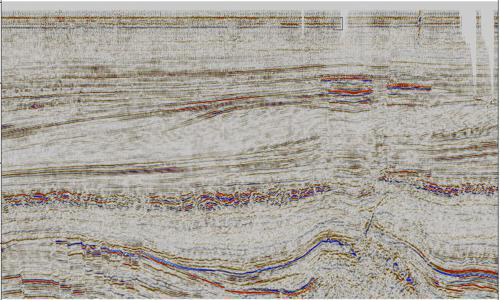

In [2]:
image.resize((500, 300))

In [3]:
#Resize seismic images
p = r'C:\Users\batub\OneDrive\ML_PATH\seismic images'

for file in os.listdir(p):
    p_img = p + "\\" + file
    img = Image.open(p_img)
    img = img.resize((500,300))
    img.save(p_img)

In [4]:
#load images
import matplotlib.image as mpimg

images = []
def load_images(folder):
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [5]:
load_images(r'C:\Users\batub\OneDrive\ML_PATH\seismic images')

[array([[[206, 206, 206],
         [163, 163, 163],
         [252, 252, 252],
         ...,
         [225, 225, 225],
         [151, 151, 151],
         [255, 255, 255]],
 
        [[198, 198, 198],
         [152, 152, 152],
         [229, 229, 229],
         ...,
         [206, 206, 206],
         [140, 140, 140],
         [251, 251, 251]],
 
        [[ 83,  83,  83],
         [ 83,  83,  83],
         [214, 214, 214],
         ...,
         [189, 189, 189],
         [134, 134, 134],
         [250, 250, 250]],
 
        ...,
 
        [[221, 222, 216],
         [118, 119, 111],
         [184, 185, 177],
         ...,
         [147, 146, 142],
         [117, 116, 112],
         [244, 243, 239]],
 
        [[218, 225, 218],
         [116, 123, 116],
         [173, 180, 173],
         ...,
         [158, 159, 154],
         [126, 127, 122],
         [251, 252, 247]],
 
        [[194, 203, 198],
         [134, 143, 138],
         [241, 250, 245],
         ...,
         [191, 191, 189],
  

In [6]:
type(images)

list

In [7]:
print('images shape:', np.array(images).shape)

images shape: (286, 300, 500, 3)


In [8]:
dataset = np.array(images)

In [9]:
import pandas as pd
label=pd.read_csv(r'C:\Users\batub\OneDrive\ML_PATH\labels.csv',delimiter=",",header=None)
labels = label[label.columns[1]]
labels

0      1
1      1
2      1
3      1
4      1
      ..
281    1
282    1
283    1
284    0
285    0
Name: 1, Length: 286, dtype: int64

In [10]:
#Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, shuffle=True,random_state=42)

In [11]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

228
228
58
58


In [28]:
d2X_train = np.reshape(X_train, (228, -1)) 
d2X_test = np.reshape(X_test, (58, -1))

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(d2X_train, y_train)
y_pred= logreg.predict(d2X_test)


C:\Users\batub\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression classifier on test set: ' + str(accuracy_score(y_test, y_pred)))

Accuracy of Logistic Regression classifier on test set: 0.8448275862068966


In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(d2X_train, y_train)
y_pred = svc.predict(d2X_test)
y_pred = [1 if n >= 0.5 else 0 for n in y_pred]

In [15]:
print('Accuracy of SVM classifier on test set: ' + str(accuracy_score(y_test, y_pred)))

Accuracy of SVM classifier on test set: 0.8448275862068966


In [16]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(d2X_train, y_train)
y_pred = knn.predict(d2X_test)
y_pred = [1 if n >= 0.5 else 0 for n in y_pred]
print('Accuracy of KNN classifier on test set: ' + str(accuracy_score(y_test, y_pred)))

Accuracy of KNN classifier on test set: 0.8448275862068966


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(d2X_train, y_train)
y_pred = gnb.predict(d2X_test)
y_pred = [1 if n >= 0.5 else 0 for n in y_pred]
print('Accuracy of NB classifier on test set: ' + str(accuracy_score(y_test, y_pred)))

Accuracy of NB classifier on test set: 0.7241379310344828


In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(d2X_train, y_train)
y_pred = clf.predict(d2X_test)
y_pred = [1 if n >= 0.5 else 0 for n in y_pred]
print('Accuracy of Decision Tree classifier on test set: ' + str(accuracy_score(y_test, y_pred)))

Accuracy of Decision Tree classifier on test set: 0.7068965517241379


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit_transform(d2X_train, y_train)
y_pred = lda.predict(d2X_test)
y_pred = [1 if n >= 0.5 else 0 for n in y_pred]
print('Accuracy of LDA classifier on test set: ' + str(accuracy_score(y_test, y_pred)))

Accuracy of LDA classifier on test set: 0.7931034482758621


Evaluate SVM's Performance

In [20]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(d2X_train, y_train)
y_pred = svc.predict(d2X_test)
y_pred = [1 if n >= 0.5 else 0 for n in y_pred]
print('Accuracy of SVM classifier on test set: ' + str(accuracy_score(y_test, y_pred)))

Accuracy of SVM classifier on test set: 0.8448275862068966


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.92      0.85      0.88        40

    accuracy                           0.84        58
   macro avg       0.82      0.84      0.83        58
weighted avg       0.86      0.84      0.85        58



In [22]:
np.bincount(y_train)

array([ 80, 148], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  3]
 [ 6 34]]


In [24]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc, d2X_train, y_train, cv=5))

[0.7826087  0.89130435 0.80434783 0.82222222 0.68888889]


In [25]:
#Fine tuning the model
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(d2X_train, y_train)
y_pred = svc.predict(d2X_test)
y_pred = [1 if n >= 0.5 else 0 for n in y_pred]
print('Accuracy of improved SVM classifier on test set: ' + str(accuracy_score(y_test, y_pred)))

Accuracy of improved SVM classifier on test set: 0.8620689655172413


In [26]:
confusion_matrix(y_test, y_pred)

array([[15,  3],
       [ 5, 35]], dtype=int64)

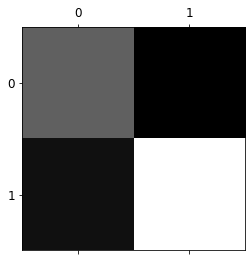

In [27]:
plt.matshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.gray)
plt.show()